# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [59]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Abize\anaconda3\python.exe -m pip install --upgrade pip' command.


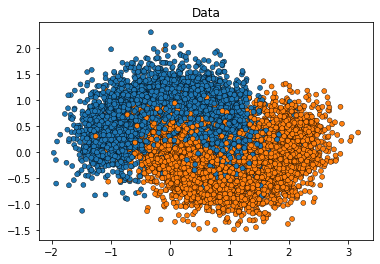

In [168]:
### Data generation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_moons(noise=0.352, random_state=1, n_samples=10000)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [7]:
df = pd.DataFrame(dict(b=X[:, 0],  y=X[:, 1], label=y))

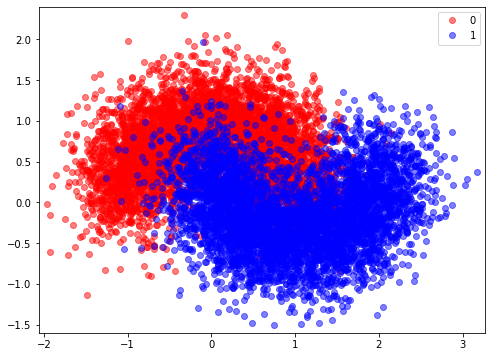

In [15]:
### This function allows to plot the two moons
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()
plot_data(X, y, figsize=None)

In [2]:
### This function allows to plot the two moons

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

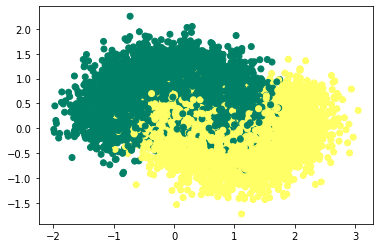

In [16]:
X, y = make_moons(noise=0.352, random_state=0, n_samples=10000)
y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer'),
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

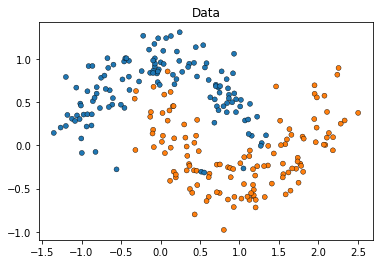

In [19]:
X, y = make_moons(noise=0.2, random_state=1, n_samples=250)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [169]:
df

,b,y,label
0,1.383412,-0.081096,1
1,1.909909,-0.364983,1
2,-0.272502,0.071768,0
3,0.958367,0.075635,1
4,2.604106,0.473597,1
...,...,...,...
95,1.076294,-0.895453,1
96,0.310956,0.483859,0
97,0.519242,-1.450758,1
98,1.442790,0.718543,0


In [68]:
X.shape

(250, 2)

In [167]:
#y.reshape(1,-1)

In [71]:
y.shape

(250,)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print("X_train :",X_train.shape, "X_test :",X_test.shape, "y_train :",y_train.shape, "y_test :",y_test.shape)

X_train : (7000, 2) X_test : (3000, 2) y_train : (7000,) y_test : (3000,)


## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
#Initialiser le model: c'est dans keras qu'il faut aller chercher le model
#Sequential(): c'est le reseau de neurone à utiliser

#Creation du reseau de neurone
#model = tf.keras.models.Sequential()

In [ ]:
#On va ajouter une couche en utilisanr tf.keras.layers
# Et on va importe la couche type Dense(SPECIFIER LE NBRE DE NOEUDS et fonction d'activation)
# On a 13 entrées 
# Le but est d'avoir UNE SEULE SORTIE
# et Specifier la valeur initial du poids : kernel_initialiser="uniform"
# Il faut specifier la taille de la couche d'entrée (On a 13 variable :input_dim=13)
# model.add(tf.keras.layers.Dense(units =5 , activation='relu', kernel_initializer="uniform", input_dim=2))

In [ ]:
#7: On va utiliser la fonction cout pour faire une MISE à JOUR DES poids
#Dire comment les poids seront mis à jour: optimizer='rmsprop'
#Precise la fonction de cout:  loss='binary_cross'

#model.compile(optimizer='rmsprop', loss=None, metrics=None)
#model.compile()
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [179]:
def initialize_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units =5 ,input_shape=(2,), activation='relu', kernel_initializer="uniform", input_dim=2))
    model.add(tf.keras.layers.Dense(units =1, activation = 'sigmoid', input_dim=1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    #Faire une synthese
    model.summary()
    return model

model = initialize_model()
model

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5)                 15        
                                                                 
 dense_37 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [180]:
# On va mettre à jour 8 echantillons :batch_size=8 
# Combien de fois je fais passer la base POUR ENTRAINER LE MODEL
# Pour chaque epochs (je vais calculer la metrique et fonction cout): epochs=100
def entrainement():
    train = model.fit(X_train, y_train, batch_size=8, epochs=100)
    return train
entrainement()

Epoch 1/100
875/875 [==============================] - 3s 3ms/step - loss: 0.4778 - binary_accuracy: 0.8144A: 2
Epoch 2/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3763 - binary_accuracy: 0.8373
Epoch 3/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3721 - binary_accuracy: 0.8386
Epoch 4/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3713 - binary_accuracy: 0.8380
Epoch 5/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3703 - binary_accuracy: 0.8384
Epoch 6/100
875/875 [==============================] - 2s 3ms/step - loss: 0.3699 - binary_accuracy: 0.8400
Epoch 7/100
875/875 [==============================] - 2s 3ms/step - loss: 0.3697 - binary_accuracy: 0.8384
Epoch 8/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3692 - binary_accuracy: 0.8370
Epoch 9/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3691 - binary_accuracy: 0.8381
Epoch 10/100
875/875 [==

875/875 [==============================] - 2s 2ms/step - loss: 0.3679 - binary_accuracy: 0.8390
Epoch 76/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3678 - binary_accuracy: 0.8379
Epoch 77/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3682 - binary_accuracy: 0.8380
Epoch 78/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3679 - binary_accuracy: 0.8387
Epoch 79/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3680 - binary_accuracy: 0.8371
Epoch 80/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3679 - binary_accuracy: 0.8384
Epoch 81/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3676 - binary_accuracy: 0.8367
Epoch 82/100
875/875 [==============================] - 2s 2ms/step - loss: 0.3677 - binary_accuracy: 0.8370
Epoch 83/100
875/875 [==============================] - 1s 2ms/step - loss: 0.3680 - binary_accuracy: 0.8386
Epoch 84/100
875/875 [==========

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [177]:
def coutJustesse():
    histo1 = model.history.history
    print(histo1)
    histo2 = model.history.__dict__
    print("=====================================")
    print(histo2)
    return histo1, histo2
coutJustesse()

{'loss': [0.36859557032585144, 0.36857545375823975, 0.3685150444507599, 0.368468701839447, 0.3681126832962036, 0.36832135915756226, 0.3681591749191284, 0.3677084743976593, 0.3684622347354889, 0.3684658408164978, 0.3683188557624817, 0.36803725361824036, 0.36786994338035583, 0.368183970451355, 0.3675766587257385, 0.3680790364742279, 0.3680421710014343, 0.367890864610672, 0.36792486906051636, 0.36786773800849915, 0.36807072162628174, 0.36794936656951904, 0.3682394325733185, 0.3680005371570587, 0.3679732084274292, 0.3679578900337219, 0.36788424849510193, 0.36793050169944763, 0.3680620789527893, 0.36808767914772034, 0.3675646185874939, 0.3674340844154358, 0.3681504726409912, 0.36760249733924866, 0.36784082651138306, 0.3677917718887329, 0.36773645877838135, 0.36776119470596313, 0.36785322427749634, 0.367626816034317, 0.3677835464477539, 0.3680053651332855, 0.3678656816482544, 0.3676891326904297, 0.367348313331604, 0.36798492074012756, 0.3677867650985718, 0.36794188618659973, 0.36770877242088

({'loss': [0.36859557032585144,
   0.36857545375823975,
   0.3685150444507599,
   0.368468701839447,
   0.3681126832962036,
   0.36832135915756226,
   0.3681591749191284,
   0.3677084743976593,
   0.3684622347354889,
   0.3684658408164978,
   0.3683188557624817,
   0.36803725361824036,
   0.36786994338035583,
   0.368183970451355,
   0.3675766587257385,
   0.3680790364742279,
   0.3680421710014343,
   0.367890864610672,
   0.36792486906051636,
   0.36786773800849915,
   0.36807072162628174,
   0.36794936656951904,
   0.3682394325733185,
   0.3680005371570587,
   0.3679732084274292,
   0.3679578900337219,
   0.36788424849510193,
   0.36793050169944763,
   0.3680620789527893,
   0.36808767914772034,
   0.3675646185874939,
   0.3674340844154358,
   0.3681504726409912,
   0.36760249733924866,
   0.36784082651138306,
   0.3677917718887329,
   0.36773645877838135,
   0.36776119470596313,
   0.36785322427749634,
   0.367626816034317,
   0.3677835464477539,
   0.3680053651332855,
   0.36786568

❓ Plot the history of the train loss using the following function

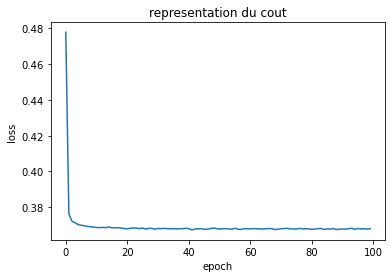

In [181]:
# summarize history for loss
def representationGraphique():
    plt.plot(model.history.history['loss'])
    #plt.plot(model.history.history['accuracy'])
    plt.title('representation du cout')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()
representationGraphique()    

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [182]:
def evaluationPrediction():
    evaluation = model.evaluate(X_test, y_test)
    print("evaluation :",evaluation)
    y_prediction = model.predict(X_test, verbose=1)
    print("y_prediction :",y_prediction)
    return evaluation, y_prediction
evaluationPrediction()

94/94 [==============================] - 0s 2ms/step - loss: 0.3803 - binary_accuracy: 0.8313
evaluation : [0.38031506538391113, 0.831333339214325]
94/94 [==============================] - 0s 1ms/step
y_prediction : [[0.95203257]
 [0.9229478 ]
 [0.1914562 ]
 ...
 [0.79958177]
 [0.9571494 ]
 [0.7313098 ]]


([0.38031506538391113, 0.831333339214325],
 array([[0.95203257],
        [0.9229478 ],
        [0.1914562 ],
        ...,
        [0.79958177],
        [0.9571494 ],
        [0.7313098 ]], dtype=float32))

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [127]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.8267


[0.5344600081443787, 0.8266666531562805]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

In [141]:
model.compile(loss='mean_squared_error',metrics=['binary_crossentropy'],optimizer=tf.keras.optimizers.Adam(0.001))

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

0.8266666531562805

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

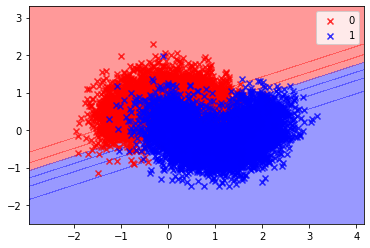

In [184]:
from utils import plots
plot_decision_regions(X, y, classifier = model, test_idx=None, resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [185]:
model = initialize_model()
def entrainement():
    train = model.fit(X_train, y_train, batch_size=8, epochs=500)
    return train
entrainement()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 5)                 15        
                                                                 
 dense_39 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
875/875 [==============================] - 2s 2ms/step - loss: 0.4748 - binary_accuracy: 0.8210
Epoch 2/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3755 - binary_accuracy: 0.8364
Epoch 3/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3717 - binary_accuracy: 0.8370
Epoch 4/500
875/875 [==============================] - 3s 3ms/step - loss: 0.3706 - binary_accuracy: 0.8377
Epoch 5/500
875/875 [

875/875 [==============================] - 1s 2ms/step - loss: 0.3589 - binary_accuracy: 0.8430
Epoch 69/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3593 - binary_accuracy: 0.8421
Epoch 70/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3589 - binary_accuracy: 0.8424
Epoch 71/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3581 - binary_accuracy: 0.8419
Epoch 72/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3580 - binary_accuracy: 0.8417
Epoch 73/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3576 - binary_accuracy: 0.8424
Epoch 74/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3576 - binary_accuracy: 0.8413
Epoch 75/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3574 - binary_accuracy: 0.8433
Epoch 76/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3568 - binary_accuracy: 0.8409A: 1s - loss: 0.3
Epoch 77/500
87

875/875 [==============================] - 2s 2ms/step - loss: 0.3521 - binary_accuracy: 0.8441A: 1s - loss: 0.3510 - binary_accu - ETA: 0s - loss: 0.3554 - binary_accurac
Epoch 142/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3526 - binary_accuracy: 0.8450
Epoch 143/500
875/875 [==============================] - 2s 3ms/step - loss: 0.3521 - binary_accuracy: 0.8454A: 0s - loss: 0.3541 - binary_accuracy:
Epoch 144/500
875/875 [==============================] - 3s 4ms/step - loss: 0.3523 - binary_accuracy: 0.8443
Epoch 145/500
875/875 [==============================] - 3s 3ms/step - loss: 0.3520 - binary_accuracy: 0.8460A: 0s - loss: 0.3495 - binary_accuracy: 0.
Epoch 146/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8436
Epoch 147/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8471
Epoch 148/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3516 - b

875/875 [==============================] - 2s 2ms/step - loss: 0.3513 - binary_accuracy: 0.8454
Epoch 212/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3505 - binary_accuracy: 0.8461
Epoch 213/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3513 - binary_accuracy: 0.8444
Epoch 214/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3515 - binary_accuracy: 0.8431
Epoch 215/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3508 - binary_accuracy: 0.8449
Epoch 216/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3510 - binary_accuracy: 0.8449
Epoch 217/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3514 - binary_accuracy: 0.8446
Epoch 218/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3508 - binary_accuracy: 0.8467
Epoch 219/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3512 - binary_accuracy: 0.8443
Epoch 220/500
875/875 [=

875/875 [==============================] - 1s 2ms/step - loss: 0.3507 - binary_accuracy: 0.8454
Epoch 285/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8463
Epoch 286/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8429
Epoch 287/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3505 - binary_accuracy: 0.8457
Epoch 288/500
875/875 [==============================] - 1s 1ms/step - loss: 0.3504 - binary_accuracy: 0.8441
Epoch 289/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8441
Epoch 290/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3504 - binary_accuracy: 0.8464A: 1s - loss: 0.3568 - 
Epoch 291/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3507 - binary_accuracy: 0.8440A: 1s - loss: 0.3384 - binar
Epoch 292/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3508

875/875 [==============================] - 1s 2ms/step - loss: 0.3503 - binary_accuracy: 0.8460
Epoch 358/500
875/875 [==============================] - 1s 1ms/step - loss: 0.3506 - binary_accuracy: 0.8446
Epoch 359/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3505 - binary_accuracy: 0.8457
Epoch 360/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8447
Epoch 361/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8446
Epoch 362/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8436
Epoch 363/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3505 - binary_accuracy: 0.8463
Epoch 364/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3501 - binary_accuracy: 0.8447
Epoch 365/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3503 - binary_accuracy: 0.8456
Epoch 366/500
875/875 [=

875/875 [==============================] - 2s 2ms/step - loss: 0.3502 - binary_accuracy: 0.8444
Epoch 430/500
875/875 [==============================] - 2s 2ms/step - loss: 0.3506 - binary_accuracy: 0.8470
Epoch 431/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3504 - binary_accuracy: 0.8461
Epoch 432/500
875/875 [==============================] - 1s 1ms/step - loss: 0.3504 - binary_accuracy: 0.8460
Epoch 433/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3504 - binary_accuracy: 0.8460
Epoch 434/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3502 - binary_accuracy: 0.8460
Epoch 435/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3504 - binary_accuracy: 0.8444
Epoch 436/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3501 - binary_accuracy: 0.8447
Epoch 437/500
875/875 [==============================] - 1s 2ms/step - loss: 0.3502 - binary_accuracy: 0.8464
Epoch 438/500
875/875 [=

❓ Did the test accuracy improve? 

In [ ]:
#Oui la precision c'est bien ameliore

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [186]:
def initialize_model2():
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Dense(units =20 ,input_shape=(2,), activation='relu', kernel_initializer="uniform", input_dim=2))
    model2.add(tf.keras.layers.Dense(units =10 ,input_shape=(2,), activation='relu', kernel_initializer="uniform"))
    model2.add(tf.keras.layers.Dense(units =5 ,input_shape=(2,), activation='relu', kernel_initializer="uniform"))
    model2.add(tf.keras.layers.Dense(units =1, activation = 'sigmoid', input_dim=1))
    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    #Faire une synthese
    model2.summary()
    return model2

model2 = initialize_model2()
model2

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                60        
                                                                 
 dense_41 (Dense)            (None, 10)                210       
                                                                 
 dense_42 (Dense)            (None, 5)                 55        
                                                                 
 dense_43 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [154]:
def evaluationPrediction():
    evaluation = model2.evaluate(X_test, y_test)
    print("evaluation :",evaluation)
    y_prediction = model2.predict(X_test, verbose=1)
    print("y_prediction :",y_prediction)
    return evaluation, y_prediction
evaluationPrediction()

3/3 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.4800
evaluation : [0.6931469440460205, 0.47999998927116394]
3/3 [==============================] - 0s 2ms/step
y_prediction : [[0.50000066]
 [0.5000007 ]
 [0.50000286]
 [0.5000023 ]
 [0.50000226]
 [0.50000113]
 [0.49999994]
 [0.4999958 ]
 [0.5000013 ]
 [0.5000006 ]
 [0.4999991 ]
 [0.49999997]
 [0.5000011 ]
 [0.49999887]
 [0.50000155]
 [0.5000005 ]
 [0.5       ]
 [0.49999955]
 [0.500002  ]
 [0.49999958]
 [0.49999887]
 [0.50000036]
 [0.50000346]
 [0.5000011 ]
 [0.49999958]
 [0.5000001 ]
 [0.50000167]
 [0.500001  ]
 [0.49999636]
 [0.49999824]
 [0.5000009 ]
 [0.50000346]
 [0.5000012 ]
 [0.50000167]
 [0.4999996 ]
 [0.4999999 ]
 [0.50000083]
 [0.49999946]
 [0.5000019 ]
 [0.50000066]
 [0.5000019 ]
 [0.50000095]
 [0.50000167]
 [0.49999547]
 [0.5000024 ]
 [0.5       ]
 [0.5000009 ]
 [0.49999878]
 [0.49999636]
 [0.50000066]
 [0.4999995 ]
 [0.5000014 ]
 [0.5000018 ]
 [0.5000009 ]
 [0.500002  ]
 [0.50000197]
 [0

([0.6931469440460205, 0.47999998927116394],
 array([[0.50000066],
        [0.5000007 ],
        [0.50000286],
        [0.5000023 ],
        [0.50000226],
        [0.50000113],
        [0.49999994],
        [0.4999958 ],
        [0.5000013 ],
        [0.5000006 ],
        [0.4999991 ],
        [0.49999997],
        [0.5000011 ],
        [0.49999887],
        [0.50000155],
        [0.5000005 ],
        [0.5       ],
        [0.49999955],
        [0.500002  ],
        [0.49999958],
        [0.49999887],
        [0.50000036],
        [0.50000346],
        [0.5000011 ],
        [0.49999958],
        [0.5000001 ],
        [0.50000167],
        [0.500001  ],
        [0.49999636],
        [0.49999824],
        [0.5000009 ],
        [0.50000346],
        [0.5000012 ],
        [0.50000167],
        [0.4999996 ],
        [0.4999999 ],
        [0.50000083],
        [0.49999946],
        [0.5000019 ],
        [0.50000066],
        [0.5000019 ],
        [0.50000095],
        [0.50000167],
        [0

❓ What is the number of parameters of your new model?

60 + 210 + 55 + 6 = 331

Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [153]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, y_1, test_size = 0.3, random_state=0)
print("X_train :",X_train2.shape, "X_test :",X_test2.shape, "y_train :",y_train2.shape, "y_test :",y_test2.shape)

X_train : (350, 2) X_test : (150, 2) y_train : (350,) y_test : (150,)


In [155]:
model = initialize_model()
def entrainement():
    train = model.fit(X_train2, y_train2, batch_size=8, epochs=500)
    return train
entrainement()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 15        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
44/44 [==============================] - 1s 3ms/step - loss: 0.6767 - binary_accuracy: 0.8000
Epoch 2/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6490 - binary_accuracy: 0.8800
Epoch 3/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6208 - binary_accuracy: 0.8771
Epoch 4/500
44/44 [==============================] - ETA: 0s - loss: 0.5898 - binary_accuracy: 0.880 - 0s 5ms/step - loss: 0.5904 - bin

44/44 [==============================] - 0s 7ms/step - loss: 0.2414 - binary_accuracy: 0.9029
Epoch 71/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2415 - binary_accuracy: 0.9000
Epoch 72/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2414 - binary_accuracy: 0.9057
Epoch 73/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2412 - binary_accuracy: 0.9057
Epoch 74/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2412 - binary_accuracy: 0.9057A: 0s - loss: 0.2339 - binary_accuracy: 0.909
Epoch 75/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2411 - binary_accuracy: 0.9057
Epoch 76/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2411 - binary_accuracy: 0.9057A: 0s - loss: 0.2505 - binary_accuracy: 0.90
Epoch 77/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2410 - binary_accuracy: 0.9029A: 0s - loss: 0.2011 - binary_accuracy: 0.93
Epoch 78/500
44/44 [====

44/44 [==============================] - 0s 4ms/step - loss: 0.2400 - binary_accuracy: 0.9057
Epoch 143/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2400 - binary_accuracy: 0.9029
Epoch 144/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2397 - binary_accuracy: 0.9029A: 0s - loss: 0.2561 - binary_accuracy: 0.8
Epoch 145/500
44/44 [==============================] - 0s 5ms/step - loss: 0.2419 - binary_accuracy: 0.9029
Epoch 146/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2396 - binary_accuracy: 0.9029
Epoch 147/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2396 - binary_accuracy: 0.9000
Epoch 148/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2395 - binary_accuracy: 0.9000A: 0s - loss: 0.2379 - binary_accuracy: 0.89
Epoch 149/500
44/44 [==============================] - 0s 7ms/step - loss: 0.2395 - binary_accuracy: 0.9029
Epoch 150/500
44/44 [==============================] - 0s 5ms/s

44/44 [==============================] - 0s 2ms/step - loss: 0.2399 - binary_accuracy: 0.9057
Epoch 216/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2391 - binary_accuracy: 0.9057
Epoch 217/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2395 - binary_accuracy: 0.9029
Epoch 218/500
44/44 [==============================] - 0s 4ms/step - loss: 0.2388 - binary_accuracy: 0.9029
Epoch 219/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2393 - binary_accuracy: 0.9000
Epoch 220/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2392 - binary_accuracy: 0.9057
Epoch 221/500
44/44 [==============================] - 0s 3ms/step - loss: 0.2392 - binary_accuracy: 0.9057
Epoch 222/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2391 - binary_accuracy: 0.9029
Epoch 223/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2391 - binary_accuracy: 0.9000
Epoch 224/500
44/44 [=====================

44/44 [==============================] - 0s 2ms/step - loss: 0.2388 - binary_accuracy: 0.9000
Epoch 291/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2386 - binary_accuracy: 0.9000
Epoch 292/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9029
Epoch 293/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2388 - binary_accuracy: 0.9000
Epoch 294/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2386 - binary_accuracy: 0.9057
Epoch 295/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9029
Epoch 296/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9000
Epoch 297/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9029
Epoch 298/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2388 - binary_accuracy: 0.9029
Epoch 299/500
44/44 [=====================

44/44 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.8971
Epoch 366/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2388 - binary_accuracy: 0.9000
Epoch 367/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2396 - binary_accuracy: 0.9029
Epoch 368/500
44/44 [==============================] - ETA: 0s - loss: 0.2329 - binary_accuracy: 0.900 - 0s 2ms/step - loss: 0.2384 - binary_accuracy: 0.9000
Epoch 369/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2382 - binary_accuracy: 0.9057
Epoch 370/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2383 - binary_accuracy: 0.9029
Epoch 371/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2388 - binary_accuracy: 0.9029
Epoch 372/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2383 - binary_accuracy: 0.9000
Epoch 373/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2382 - binary_accuracy:

44/44 [==============================] - 0s 2ms/step - loss: 0.2378 - binary_accuracy: 0.9029
Epoch 441/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2380 - binary_accuracy: 0.9000
Epoch 442/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2382 - binary_accuracy: 0.9029
Epoch 443/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2380 - binary_accuracy: 0.9029
Epoch 444/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2383 - binary_accuracy: 0.9057
Epoch 445/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2381 - binary_accuracy: 0.9029
Epoch 446/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2382 - binary_accuracy: 0.9057
Epoch 447/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2378 - binary_accuracy: 0.9000
Epoch 448/500
44/44 [==============================] - 0s 2ms/step - loss: 0.2378 - binary_accuracy: 0.9000
Epoch 449/500
44/44 [=====================

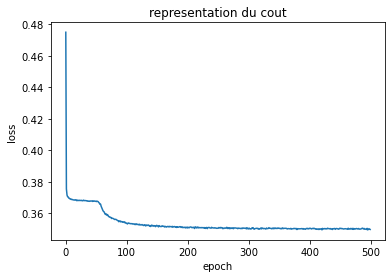

In [189]:
# summarize history for loss
def representationGraphique():
    plt.plot(model.history.history['loss'])
    #plt.plot(model.history.history['binary_accuracy'])
    plt.title('representation du cout')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()
representationGraphique() 

❓ Do you think we have overfitted on the noise? Check it out below

Je pense que le bruit a été surajusté